In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv(r"C:\Users\Gaurav\Downloads\Groceries_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
#df['column_name'].value_counts()
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
print(df.isnull().sum())  


Member_number      0
Date               0
itemDescription    0
dtype: int64


In [13]:
duplicates = df[df.duplicated()]
print(duplicates)


       Member_number        Date   itemDescription
5015            2051  11-09-2015       frankfurter
5022            3055  18-08-2015  other vegetables
5044            1994  11-03-2015        whole milk
5055            1682  25-06-2015         pip fruit
5059            4324  05-01-2015           sausage
...              ...         ...               ...
38614           2027  26-02-2014     domestic eggs
38684           2936  07-03-2014        newspapers
38685           2311  13-03-2014        pot plants
38722           3834  18-05-2014       salty snack
38723           1146  23-05-2014            yogurt

[759 rows x 3 columns]


# df.groupby(['Member_number'])['itemDescription'] Groups all purchased items by each Member_number.
# .apply(list): Converts the grouped data into a list of items per member.
# .tolist(): Converts the Pandas Series into a Python list of lists.

In [11]:

transactions = df.groupby(['Member_number'])['itemDescription'].apply(list)
transactions = transactions.tolist()


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules


frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

s
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.head())


       antecedents     consequents  antecedent support  consequent support  \
0       (UHT-milk)          (beef)            0.078502            0.119548   
1           (beef)      (UHT-milk)            0.119548            0.078502   
2   (bottled beer)      (UHT-milk)            0.158799            0.078502   
3       (UHT-milk)  (bottled beer)            0.078502            0.158799   
4  (bottled water)      (UHT-milk)            0.213699            0.078502   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.010518    0.133987  1.120775               1.0  0.001133    1.016672   
1  0.010518    0.087983  1.120775               1.0  0.001133    1.010396   
2  0.014879    0.093700  1.193597               1.0  0.002413    1.016769   
3  0.014879    0.189542  1.193597               1.0  0.002413    1.037933   
4  0.021293    0.099640  1.269268               1.0  0.004517    1.023477   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.116940

###
- Apriori Algorithm finds frequent item sets.
- Association Rules help find strong relationships between items.
- Lift Value > 1 means items are strongly associated.


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_4772\2797135280.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


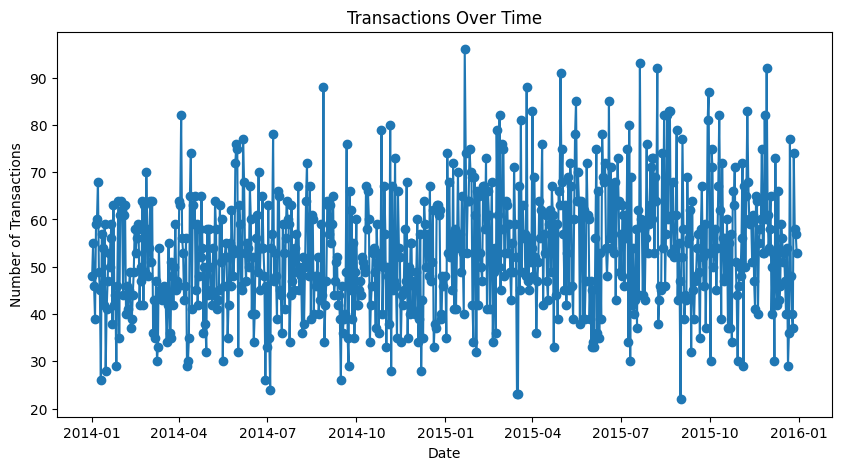

In [14]:



df['Date'] = pd.to_datetime(df['Date']) 
df_grouped = df.groupby('Date').size()

plt.figure(figsize=(10,5))
plt.plot(df_grouped, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions Over Time')
plt.show()
